In [16]:
import numpy as np
import matplotlib.pyplot as plt
import cmath
from scipy.interpolate import interp1d
import seaborn as sns



epsilon0 = 55.26
# Define the frequency range
freq_range = np.arange(50, 301, 1)

# Calculate the angular frequencies
# Create an empty array to store the results

# Print the results array


In [17]:

def thz_to_angular_frequency(thz_frequency):
    # Convert THz to Hz
    hz_frequency = thz_frequency * 1e12
    
    # Calculate the angular frequency
    angular_frequency = 2 * np.pi * hz_frequency
    
    return angular_frequency
vthz_to_angular_frequency = np.vectorize(thz_to_angular_frequency)

In [18]:
#plasma freq in TH
plasma_frequency = 2200
plasma_ang_freq = thz_to_angular_frequency(plasma_frequency)
#dampling constant in THz
damping_frequency =  5.1987
damping_ang_freq = thz_to_angular_frequency(damping_frequency)
print(f"Frequency: {plasma_ang_freq} rad/s, Angular frequency: {damping_ang_freq} rad/s")
angular_frequencies= thz_to_angular_frequency(freq_range)

Frequency: 1.382300767579509e+16 rad/s, Angular frequency: 32664395456434.516 rad/s


In [19]:

def drude_permittivity(plasma_frequency, gamma, angular_frequencies):
    # Initialize an empty list to store the calculated permittivities
    epsilon_values = np.zeros([251],dtype = 'complex_')
    # Iterate over the angular frequencies
    for i,angular_frequency in enumerate(angular_frequencies):
        # Calculate the complex relative permittivity
        epsilon = (1 - (plasma_frequency**2 / (angular_frequency**2 + 1j * angular_frequency * gamma)))
        # Append the calculated permittivity to the list
        epsilon_values[i] =np.sqrt(np.conjugate(epsilon)* epsilon)

    return epsilon_values

# Example usage

epsilon_r_values = drude_permittivity(plasma_ang_freq, damping_ang_freq, angular_frequencies)
print(f"Relative permittivities: {epsilon_r_values}")

Relative permittivities: [1924.62480055+0.j 1850.2348911 +0.j 1780.06706369+0.j 1713.80823911+0.j
 1651.17378646+0.j 1591.90448097+0.j 1535.76383416+0.j 1482.53574531+0.j
 1432.0224308 +0.j 1384.04259434+0.j 1338.42980678+0.j 1295.03106841+0.j
 1253.70553073+0.j 1214.32335777+0.j 1176.76470985+0.j 1140.91883502+0.j
 1106.68325522+0.j 1073.96303624+0.j 1042.67013161+0.j 1012.72279202+0.j
  984.04503304+0.j  956.56615444+0.j  930.22030565+0.j  904.94609232+0.j
  880.68621955+0.j  857.387168  +0.j  834.99889947+0.j  813.47458883+0.j
  792.77037982+0.j  772.84516211+0.j  753.66036767+0.j  735.17978459+0.j
  717.36938652+0.j  700.19717639+0.j  683.63304294+0.j  667.64862906+0.j
  652.21721057+0.j  637.3135848 +0.j  622.91396781+0.j  608.99589972+0.j
  595.53815727+0.j  582.52067302+0.j  569.9244607 +0.j  557.73154608+0.j
  545.92490296+0.j  534.4883938 +0.j  523.4067147 +0.j  512.66534422+0.j
  502.25049595+0.j  492.14907427+0.j  482.34863328+0.j  472.83733852+0.j
  463.60393125+0.j  454.63

In [21]:
def getKd(frecuencia, permitividad):

    K=frecuencia*np.sqrt(permitividad)*(1/3)*(10**(-15))
    return K

vgetKd= np.vectorize(getKd)

kd= vgetKd(angular_frequencies,epsilon_r_values)
print(kd)

[4.59411283+0.j 4.59454197+0.j 4.59494312+0.j 4.59531828+0.j
 4.59566926+0.j 4.59599773+0.j 4.5963052 +0.j 4.59659305+0.j
 4.59686254+0.j 4.59711484+0.j 4.59735101+0.j 4.59757203+0.j
 4.59777881+0.j 4.59797216+0.j 4.59815287+0.j 4.59832163+0.j
 4.59847912+0.j 4.59862593+0.j 4.59876262+0.j 4.59888973+0.j
 4.59900774+0.j 4.5991171 +0.j 4.59921824+0.j 4.59931154+0.j
 4.59939738+0.j 4.5994761 +0.j 4.59954802+0.j 4.59961344+0.j
 4.59967264+0.j 4.59972589+0.j 4.59977342+0.j 4.59981548+0.j
 4.59985229+0.j 4.59988404+0.j 4.59991093+0.j 4.59993315+0.j
 4.59995086+0.j 4.59996423+0.j 4.5999734 +0.j 4.59997853+0.j
 4.59997975+0.j 4.59997718+0.j 4.59997095+0.j 4.59996118+0.j
 4.59994798+0.j 4.59993144+0.j 4.59991166+0.j 4.59988875+0.j
 4.59986278+0.j 4.59983385+0.j 4.59980202+0.j 4.59976738+0.j
 4.59973001+0.j 4.59968996+0.j 4.5996473 +0.j 4.5996021 +0.j
 4.59955442+0.j 4.59950431+0.j 4.59945182+0.j 4.59939702+0.j
 4.59933994+0.j 4.59928063+0.j 4.59921914+0.j 4.59915552+0.j
 4.5990898 +0.j 4.599022

In [22]:
def getPropagationMatrix(kd):

    matrix = np.zeros([2,2], dtype='complex_')
    matrix[0][0]  = np.exp(-1j*kd)
    matrix[1][1] = np.exp(1j*kd)
    
    return matrix



In [23]:
def getTransmisionMatris(epsilon_r):
    
    matrix = np.zeros([2,2], dtype='complex_')
    t_1_t = (np.sqrt(epsilon_r) +1)/2 # 1/t
    r = (np.sqrt(epsilon_r) - 1)/(np.sqrt(epsilon_r)+1)
    matrix[0][0] = t_1_t
    matrix[0][1] = r*t_1_t
    matrix[1][0] = r*t_1_t
    matrix[1][1] = t_1_t
        
    return matrix

In [24]:
def getTransmisionMatrix2(epsilon_r):
    
    matrix = np.zeros([2,2], dtype='complex_')
    t_1_t = (np.sqrt(epsilon_r) +1)/(2*np.sqrt(epsilon_r) +1) # 1/t
    r = (1- np.sqrt(epsilon_r) )/(np.sqrt(epsilon_r)+1)
    matrix[0][0] = t_1_t
    matrix[0][1] = r*t_1_t
    matrix[1][0] = r*t_1_t
    matrix[1][1] = t_1_t
        
    return matrix

In [25]:
def getTransfermatrix(kds, epsilon_r_values):
    matrices= list()
    for i in range(len(kds)):
        totalMatrix = np.matrix(getTransmisionMatris(epsilon_r_values[i]))*np.matrix(getPropagationMatrix(kds[i]))*np.matrix(getTransmisionMatrix2(epsilon_r_values[i]))
        matrices.append(totalMatrix)
    
    return matrices


Tmatrices= getTransfermatrix(kd, epsilon_r_values)
print(Tmatrices)



[matrix([[-1.16670863e-01+21.54775688j,  2.22044605e-16-21.52537687j],
        [ 2.22044605e-16+21.52537687j, -1.16670863e-01-21.54775688j]]), matrix([[-0.11622344+21.12400363j,  0.        -21.10118211j],
        [ 0.        +21.10118211j, -0.11622344-21.12400363j]]), matrix([[-1.15803670e-01+20.71635899j,  2.22044605e-16-20.69309613j],
        [ 2.22044605e-16+20.69309613j, -1.15803670e-01-20.71635899j]]), matrix([[-1.15409571e-01+20.32392557j,  4.44089210e-16-20.30022155j],
        [ 4.44089210e-16+20.30022155j, -1.15409571e-01-20.32392557j]]), matrix([[-0.11503934+19.94587114j,  0.        -19.92172614j],
        [ 0.        +19.92172614j, -0.11503934-19.94587114j]]), matrix([[-1.14691353e-01+19.58142283j, -2.22044605e-16-19.55683702j],
        [-2.22044605e-16+19.55683702j, -1.14691353e-01-19.58142283j]]), matrix([[-1.14364100e-01+19.22986197j,  2.22044605e-16-19.20483553j],
        [ 2.22044605e-16+19.20483553j, -1.14364100e-01-19.22986197j]]), matrix([[-0.11405622+18.89051942j,  0

In [26]:
def transmitance(Tmatrices):
    T = np.zeros([251],dtype="complex_")
    R = np.zeros([251],dtype="complex_")
    
    for i,m in enumerate(Tmatrices):
        T[i] = (1/m.item(0,0))*np.conjugate((1/m.item(0,0)))
        R[i] = (m.item(1,0)/m.item(0,0))*np.conjugate((m.item(1,0)/m.item(0,0)))
    return R,T

R, T = transmitance(Tmatrices)



print(R+T)
print(np.mean(T+R))

print(np.std(R+T))

print(R[0],T[0])

[1.00004827+0.j 1.0000512 +0.j 1.00005426+0.j 1.00005744+0.j
 1.00006073+0.j 1.00006416+0.j 1.0000677 +0.j 1.00007138+0.j
 1.00007519+0.j 1.00007914+0.j 1.00008322+0.j 1.00008744+0.j
 1.0000918 +0.j 1.0000963 +0.j 1.00010095+0.j 1.00010575+0.j
 1.00011069+0.j 1.00011579+0.j 1.00012105+0.j 1.00012646+0.j
 1.00013203+0.j 1.00013776+0.j 1.00014366+0.j 1.00014973+0.j
 1.00015596+0.j 1.00016237+0.j 1.00016895+0.j 1.0001757 +0.j
 1.00018264+0.j 1.00018975+0.j 1.00019705+0.j 1.00020453+0.j
 1.0002122 +0.j 1.00022006+0.j 1.00022812+0.j 1.00023637+0.j
 1.00024482+0.j 1.00025346+0.j 1.00026231+0.j 1.00027137+0.j
 1.00028063+0.j 1.00029009+0.j 1.00029978+0.j 1.00030967+0.j
 1.00031978+0.j 1.00033011+0.j 1.00034066+0.j 1.00035144+0.j
 1.00036244+0.j 1.00037367+0.j 1.00038513+0.j 1.00039682+0.j
 1.00040875+0.j 1.00042092+0.j 1.00043332+0.j 1.00044597+0.j
 1.00045886+0.j 1.000472  +0.j 1.00048539+0.j 1.00049904+0.j
 1.00051293+0.j 1.00052709+0.j 1.0005415 +0.j 1.00055618+0.j
 1.00057112+0.j 1.000586

/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


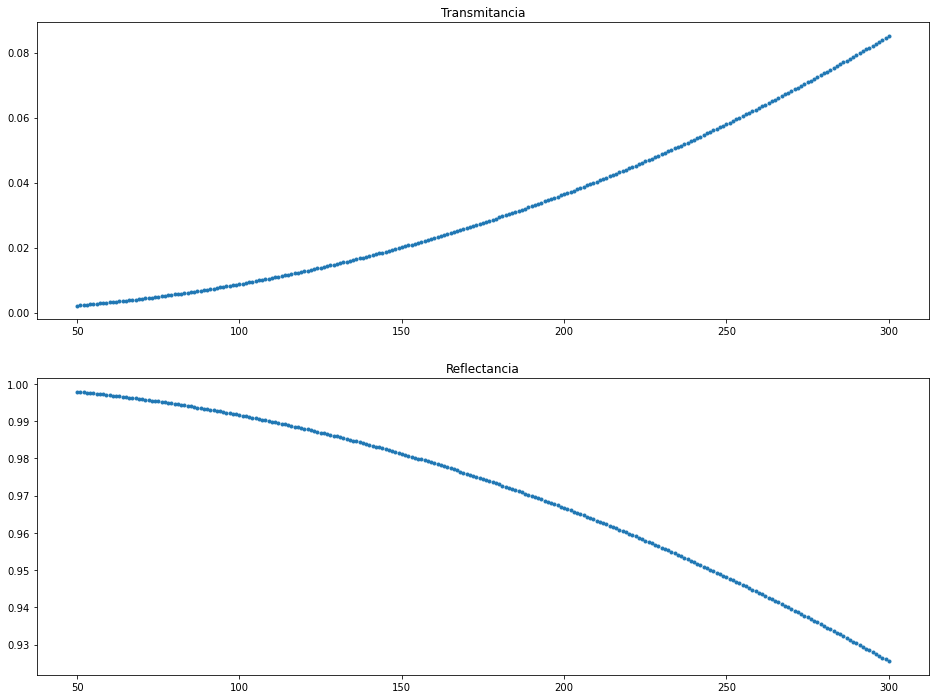

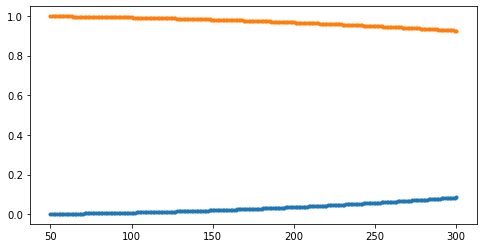

In [27]:
fig, ax2 = plt.subplots(2,1, figsize=(16,12))
ax2[0].plot(freq_range,T,'.')
ax2[1].plot(freq_range,R,'.')
ax2[0].set_title("Transmitancia")
ax2[1].set_title("Reflectancia")


plt.savefig("Graficas.png")
fig, ax3 = plt.subplots(1,1, figsize=(8,4))
ax3.plot(freq_range,T,'.')
ax3.plot(freq_range,R,'.')

plt.savefig("Graficas2.png")


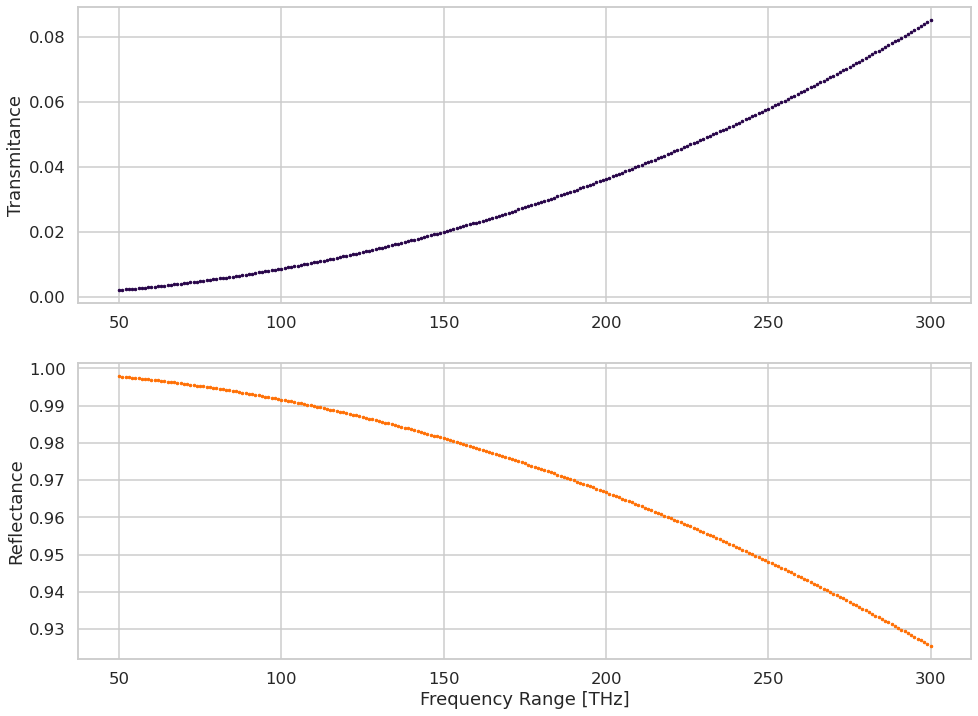

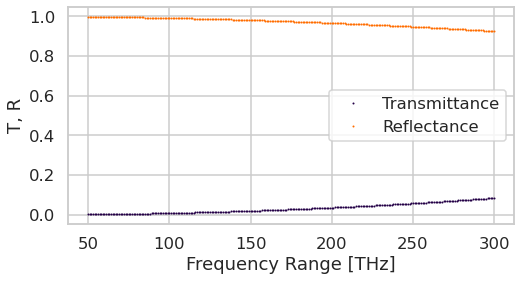

In [61]:

# Set Seaborn style and context
sns.set_style('whitegrid')
sns.set_context('talk')

# Create subplots
fig, ax2 = plt.subplots(2, 1, figsize=(16, 12))

# Plot Transmitancia
ax2[0].plot(freq_range, T, '.', color='#240046', markersize=5)
#ax2[0].set_title("Transmittance")
ax2[0].set_ylabel("Transmitance")


# Plot Reflectancia
ax2[1].plot(freq_range, R, '.', color = "#ff6d00", markersize=5)
#ax2[1].set_title("Reflectance")
ax2[1].set_ylabel("Reflectance")
ax2[1].set_xlabel("Frequency Range [THz]")
# Save the first set of plots
plt.savefig("Graficas.png")

# Create another subplot
fig, ax3 = plt.subplots(1, 1, figsize=(8, 4))

# Plot Transmitancia and Reflectancia together
ax3.plot(freq_range, T, '.', label='Transmittance', markersize=2, color="#240046")
ax3.plot(freq_range, R, '.', label='Reflectance', markersize=2,color="#ff6d00")

# Add legend and labels
ax3.legend()
ax3.set_xlabel('Frequency Range [THz]')
ax3.set_ylabel('T, R')

# Save the second plot
plt.savefig("Graficas2.png")